In [44]:
import opensea.database as db
import pandas as pd

In [45]:
bayc_listings = db.read_mongo(collection="boredapeyachtclub_listings", return_df=True)
bayc_sales = db.read_mongo(collection="boredapeyachtclub_sales", return_df=True)

In [46]:
#drop the duplicates
bayc_listings = bayc_listings.drop_duplicates(subset=['listing_id'])
bayc_sales = bayc_sales.drop_duplicates(subset=['sale_id'])

In [47]:
#sort by time
bayc_listings = bayc_listings.sort_values(by=['time'])
bayc_sales = bayc_sales.sort_values(by=['time'])

In [48]:
#get the time difference between listings in minutes
bayc_listings['time_diff'] = (bayc_listings['time'] - bayc_listings['time'].shift(1)).dt.total_seconds()/60

bayc_sales['time_diff'] = (bayc_sales['time'] - bayc_sales['time'].shift(1)).dt.total_seconds()/60

In [49]:
#sort my time difference high to low
bayc_listings = bayc_listings.sort_values(by=['time_diff'], ascending=False)

In [50]:
#add a column for month
bayc_listings['month'] = pd.DatetimeIndex(bayc_listings['time']).month
#add column for day
bayc_listings['day'] = pd.DatetimeIndex(bayc_listings['time']).day
#add column for hour
bayc_listings['hour'] = pd.DatetimeIndex(bayc_listings['time']).hour

In [51]:
#add month, day and hour to sales
bayc_sales['month'] = pd.DatetimeIndex(bayc_sales['time']).month
bayc_sales['day'] = pd.DatetimeIndex(bayc_sales['time']).day
bayc_sales['hour'] = pd.DatetimeIndex(bayc_sales['time']).hour

In [52]:
bayc_listings_jan = bayc_listings[bayc_listings['month'] == 1]

<AxesSubplot:xlabel='day'>

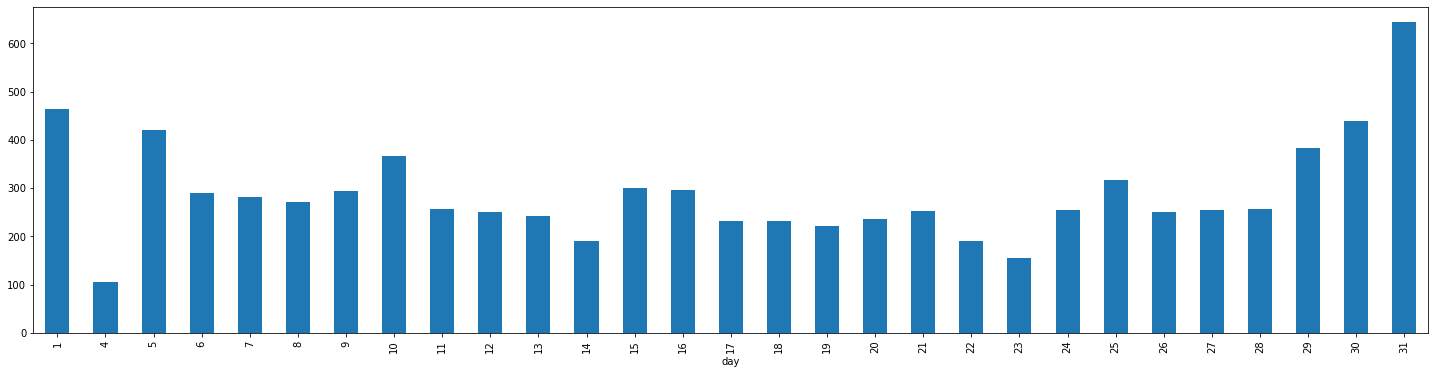

In [53]:
#plot the number of listings per day in January
bayc_listings_jan.groupby(['day']).count()['listing_id'].plot(figsize=(25,6), kind='bar')

In [54]:
#get january sales
bayc_sales_jan = bayc_sales[bayc_sales['month'] == 1]

<AxesSubplot:xlabel='day'>

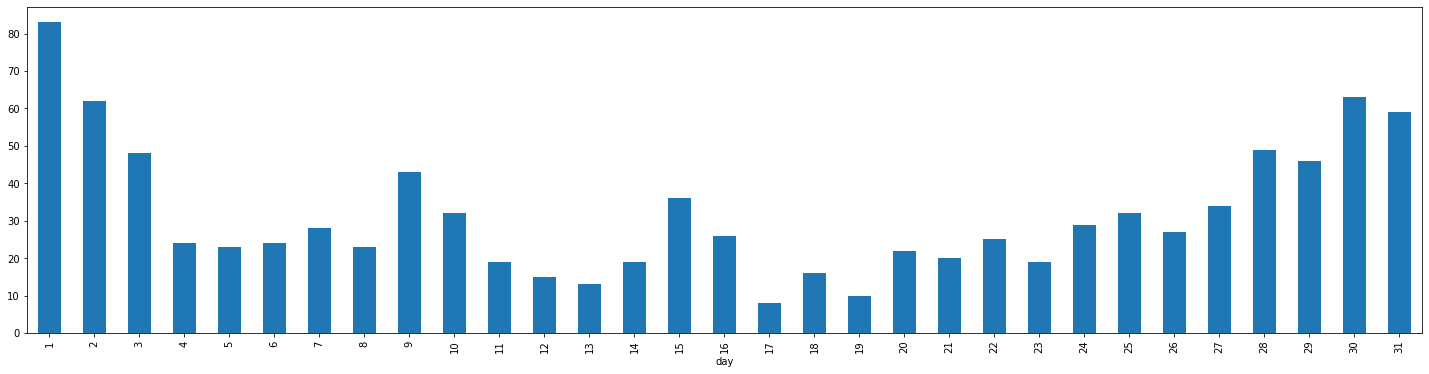

In [55]:
#plot sales per day in January
bayc_sales_jan.groupby(['day']).count()['sale_id'].plot(figsize=(25,6), kind='bar')

In [57]:
#sort bayc lsitings by time
bayc_listings = bayc_listings.sort_values(by=['time'])


In [63]:
bayc_listings.time_diff.value_counts(bins=100).head(5)

(-4.301, 43.001]        20172
(43.001, 86.001]           72
(86.001, 129.001]           2
(4257.042, 4300.043]        1
(172.002, 215.002]          0
Name: time_diff, dtype: int64

In [75]:
#filter where time difference is greater than 45 minutes
bayc_listings[bayc_listings['time_diff'] > 45]

#seems there are missing events on 11-24-21

,listing_id,asset_id,collection,event_type,time,seller_address,listing_currency,auction_type,private_auction,listing_price,duration,time_diff,month,day,hour
10000,2117307903,4724,boredapeyachtclub,created,2021-11-24 02:38:27.121,0xf6bb6e7e886ca2c12478a46b27d87ceb8aa28a2e,ETH,dutch,False,50.50,3262104,65.886883,11,24,2
9582,2150842984,86,boredapeyachtclub,created,2021-11-25 11:31:33.782,0xa84b2f7a52f05dba57b1059f7bb8356a74398391,ETH,dutch,False,55.00,14691748,46.934883,11,25,11
9735,2152342020,6712,boredapeyachtclub,created,2021-11-25 13:14:12.979,0x77d550883410f4d1d88c2bf79132f375cfed31ef,ETH,dutch,False,60.00,15634879,72.242967,11,25,13
9734,2153347696,9887,boredapeyachtclub,created,2021-11-25 14:19:27.357,0x25aaf13451e66f4f322a6105f7b295d1a7e9da96,ETH,dutch,False,250.00,85348,47.044233,11,25,14
9761,2167727977,1133,boredapeyachtclub,created,2021-11-26 03:03:27.992,0xb4ee2f98d0e3d358f05d5e1747f1ad73df5a58cc,ETH,dutch,False,63.00,172757,50.669317,11,26,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12840,3107936184,3810,boredapeyachtclub,created,2022-01-27 07:54:48.663,0xe3ff4aa7134d8568813a7f5f3622462d512904f0,ETH,dutch,False,125.00,776508,46.685217,1,27,7
12545,3126758399,9555,boredapeyachtclub,created,2022-01-28 09:37:46.500,0x245b51b64be7ea3bf5cf71fdededd4f7550eb54b,ETH,dutch,False,139.00,259287,58.364383,1,28,9
12532,3129743317,6645,boredapeyachtclub,created,2022-01-28 13:02:36.564,0xbbaac6ed301bd1192ec7492d6f20bb9ea6665a72,ETH,dutch,False,109.00,3631,68.658450,1,28,13
12023,3158702688,8016,boredapeyachtclub,created,2022-01-30 00:20:09.800,0x4836ae11037f696693c2916834754fa6c2ecc27d,ETH,dutch,False,199.00,604886,74.260750,1,30,0


In [76]:
import opensea.opensea_assets as events
#!pip install Historic_Crypto
events.update_opensea_events(collection='boredapeyachtclub',search_after='2022-11-21', search_before='2022-11-23', )

-----------------------------------------------------------
Getting boredapeyachtclub sales data...
1 API calls made
2 API calls made
3 API calls made
4 API calls made
5 API calls made
6 API calls made
7 API calls made
8 API calls made
9 API calls made
10 API calls made
11 API calls made
12 API calls made
13 API calls made
14 API calls made
15 API calls made
16 API calls made
17 API calls made
18 API calls made
19 API calls made
20 API calls made
21 API calls made
22 API calls made
23 API calls made
24 API calls made
25 API calls made
26 API calls made
27 API calls made
28 API calls made
29 API calls made
30 API calls made
31 API calls made
32 API calls made
33 API calls made
34 API calls made
35 API calls made
36 API calls made
37 API calls made
38 API calls made
39 API calls made
40 API calls made
41 API calls made
42 API calls made
43 API calls made
44 API calls made
45 API calls made
46 API calls made
47 API calls made
48 API calls made
49 API calls made
50 API calls made
51 API ca

KeyboardInterrupt: 